In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 50.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=6f92fd6f59d6d5ae5658f20a97a3dd1ddeba6a088a0cdeaa9239d8f89e51c0c1
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
cur_path = "/content/drive/MyDrive/final_project/"

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('final').getOrCreate()

In [13]:
data = spark.read.csv(cur_path+"data.csv",inferSchema=True,header=True)

In [14]:
data.show()

+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+----------------+--------+-------+
|               date|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|sqft_above|sqft_basement|yr_built|yr_renovated|              street|            city|statezip|country|
+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+----------------+--------+-------+
|2014-05-02 00:00:00| 313000.0|     3.0|      1.5|       1340|    7912|   1.5|         0|   0|        3|      1340|            0|    1955|        2005|18810 Densmore Ave N|       Shoreline|WA 98133|    USA|
|2014-05-02 00:00:00|2384000.0|     5.0|      2.5|       3650|    9050|   2.0|         0|   4|        5|      3370|          280|    1921|           0|     709 W Blaine St|

In [15]:
output=spark.read.csv(cur_path+"output.csv",inferSchema=True,header=True)

In [16]:
output.show()

+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+----------------+--------+-------+
|               date|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|sqft_above|sqft_basement|yr_built|yr_renovated|              street|            city|statezip|country|
+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+----------------+--------+-------+
|2014-05-02 00:00:00| 313000.0|     3.0|      1.5|       1340|    7912|   1.5|         0|   0|        3|      1340|            0|    1955|        2005|18810 Densmore Ave N|       Shoreline|WA 98133|    USA|
|2014-05-02 00:00:00|2384000.0|     5.0|      2.5|       3650|    9050|   2.0|         0|   4|        5|      3370|          280|    1921|           0|     709 W Blaine St|

In [17]:
print((data.count(), len(data.columns)))

(4600, 18)


In [18]:
print((output.count(),len(output.columns)))

(4600, 18)


In [19]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [20]:
print(data.select('city').distinct().count())
print(data.select('street').distinct().count(), 'multiple of same street address???')
print(data.select('statezip').distinct().count())
print(data.select('country').distinct().count())

44
4525 multiple of same street address???
77
1


In [21]:
data.groupBy('street').count().orderBy('count',ascending=False).show()

+--------------------+-----+
|              street|count|
+--------------------+-----+
|2520 Mulberry Wal...|    4|
|2500 Mulberry Wal...|    3|
|  13800 453rd Ave SE|    2|
|  Burke-Gilman Trail|    2|
| 35229 SE Terrace St|    2|
|     6008 8th Ave NE|    2|
|     1610 N 185th St|    2|
|    7490 85th Ave SE|    2|
|    13820 NE 72nd Pl|    2|
|    9413 34th Ave SW|    2|
|      353 N 105th St|    2|
|   8434 W Mercer Way|    2|
|       513 N 46th St|    2|
|      323 25th Ave S|    2|
|     2050 14th Ave W|    2|
|  13420 121st Ave NE|    2|
|       611 N 46th St|    2|
| 2358 Fairview Ave E|    2|
|   4507 Linden Ave N|    2|
|      820 NW 95th St|    2|
+--------------------+-----+
only showing top 20 rows



In [22]:
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show() # NO NA's

+----+-----+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+------+----+--------+-------+
|date|price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|sqft_above|sqft_basement|yr_built|yr_renovated|street|city|statezip|country|
+----+-----+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+------+----+--------+-------+
|   0|    0|       0|        0|          0|       0|     0|         0|   0|        0|         0|            0|       0|           0|     0|   0|       0|      0|
+----+-----+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+------+----+--------+-------+



In [23]:
data.groupBy('bedrooms').count().orderBy('count',ascending=False).show() #### ???????????????????????

+--------+-----+
|bedrooms|count|
+--------+-----+
|     3.0| 2032|
|     4.0| 1531|
|     2.0|  566|
|     5.0|  353|
|     6.0|   61|
|     1.0|   38|
|     7.0|   14|
|     8.0|    2|
|     0.0|    2|
|     9.0|    1|
+--------+-----+



In [24]:
data.distinct().count()

4600

In [25]:
data.groupBy('price').count().orderBy('price').show(n=20)


+-------------+-----+
|        price|count|
+-------------+-----+
|          0.0|   49|
|       7800.0|    1|
|      80000.0|    1|
|      83000.0|    1|
|      83300.0|    2|
|      84350.0|    1|
|      87500.0|    1|
|      90000.0|    2|
|     100000.0|    4|
|     102500.0|    1|
|     107500.0|    1|
|108333.333333|    1|
|     110000.0|    2|
|     110700.0|    1|
|     115000.0|    1|
|117833.333333|    1|
|     119500.0|    1|
|     120000.0|    1|
|     120750.0|    1|
|     124740.0|    1|
+-------------+-----+
only showing top 20 rows



In [26]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import RegexTokenizer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import OneHotEncoder, StringIndexer, MinMaxScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression


In [27]:
tokenizer = Tokenizer(inputCol="street", outputCol="tokenized_street")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="tokenized_features")
encoder_city = OneHotEncoder(
    inputCols=["qualificationcity"],  
    outputCols=["city_vector"]
)
encoder_zip = OneHotEncoder(
    inputCols=["qualificationzip"],  
    outputCols=["statezip_vector"]
)
qualification_indexer_city = StringIndexer(inputCol="city", outputCol="qualificationcity")
qualification_indexer_zip = StringIndexer(inputCol="statezip", outputCol="qualificationzip")

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

vectorAssembler = VectorAssembler(inputCols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','qualificationcity','qualificationzip','tokenized_features'], outputCol='features')
lr = LinearRegression(labelCol='price')

pipeline = Pipeline(stages=[tokenizer, hashingTF,qualification_indexer_city,qualification_indexer_zip, encoder_city, encoder_zip, vectorAssembler, lr])

In [28]:
final_data = data.select(['bedrooms','price','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','city','statezip'])
final_data=final_data.where("price!=0")


In [29]:
train_data, test_data = final_data.randomSplit(weights=[0.7,0.3],seed=74)

In [30]:
train_data.show()

+--------+---------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+
|bedrooms|    price|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|sqft_above|sqft_basement|yr_built|yr_renovated|              street|     city|statezip|
+--------+---------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+
|     0.0|1095000.0|      0.0|       3064|    4764|   3.5|         0|   2|        3|      3064|            0|    1990|        2009|       814 E Howe St|  Seattle|WA 98102|
|     0.0|1295648.0|      0.0|       4810|   28008|   2.0|         0|   0|        3|      4810|            0|    1990|        2009|    20418 NE 64th Pl|  Redmond|WA 98053|
|     1.0|  80000.0|     0.75|        430|    5050|   1.0|         0|   0|        2|       430|            0|    1912|           0|32215 E R

In [31]:
df_transformed = pipeline.fit(final_data)

In [32]:
prediction=df_transformed.transform(test_data)

In [33]:
prediction.show()

+--------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+--------------------+--------------------+-----------------+----------------+---------------+---------------+--------------------+------------------+
|bedrooms|   price|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|sqft_above|sqft_basement|yr_built|yr_renovated|              street|     city|statezip|    tokenized_street|  tokenized_features|qualificationcity|qualificationzip|    city_vector|statezip_vector|            features|        prediction|
+--------+--------+---------+-----------+--------+------+----------+----+---------+----------+-------------+--------+------------+--------------------+---------+--------+--------------------+--------------------+-----------------+----------------+---------------+---------------+--------------------+------------------+
|     1.0|115000.0|      2.0|       1150

In [34]:
prediction.toPandas().to_csv(cur_path+"prediction-aws.csv")

In [35]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='price')
evaluator.setPredictionCol("prediction")
print(evaluator.evaluate(prediction, {evaluator.metricName: "r2"}))
evaluator.evaluate(prediction, {evaluator.metricName: "rmse"})


0.997489897782658


40819.08762568456

In [36]:
df=prediction.select('price','prediction').toPandas()

In [37]:
df["prediction"] = df["prediction"].round(1)
df

,price,prediction
0,115000.0,115058.2
1,135000.0,135227.3
2,190000.0,190347.5
3,194000.0,194208.0
4,202000.0,202339.1
...,...,...
1369,824000.0,822580.7
1370,1240000.0,1239547.0
1371,1950000.0,1949751.8
1372,2280000.0,2278392.2


In [38]:
df['residuals']= ((df['price']-df['prediction']))

In [39]:
df['residuals'].sort_values()

790    -325265.8
771    -299703.2
71     -223338.9
754    -212456.1
76     -189395.1
          ...   
428     219156.1
540     228102.1
1339    260507.3
670     286822.5
1200    301100.7
Name: residuals, Length: 1374, dtype: float64

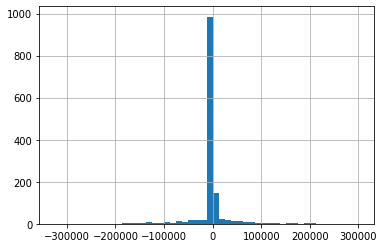

In [40]:
df['residuals'].hist(bins=50)

In [41]:
df = prediction.select('bedrooms','price','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','city','statezip','prediction')

In [42]:
df.head()

Row(bedrooms=1.0, price=115000.0, bathrooms=2.0, sqft_living=1150, sqft_lot=9812, floors=1.0, waterfront=0, view=0, condition=4, sqft_above=1150, sqft_basement=0, yr_built=1962, yr_renovated=0, street='34215 40th Ave S', city='Auburn', statezip='WA 98001', prediction=115058.17609109753)

Redoing Model with transform to get beta coefficients

In [47]:
tokenizer = Tokenizer(inputCol="street", outputCol="tokenized_street")
df = tokenizer.transform(train_data)
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="tokenized_features")
df=hashingTF.transform(df)

qualification_indexer_city = StringIndexer(inputCol="city", outputCol="qualificationcity")
df=qualification_indexer_city.fit(df).transform(df)
qualification_indexer_zip = StringIndexer(inputCol="statezip", outputCol="qualificationzip")
df=qualification_indexer_zip.fit(df).transform(df)
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
encoder_city = OneHotEncoder(
    inputCols=["qualificationcity"],  
    outputCols=["city_vector"]
)
df=encoder_city.fit(df).transform(df)
encoder_zip = OneHotEncoder(
    inputCols=["qualificationzip"],  
    outputCols=["statezip_vector"]
)
df=encoder_zip.fit(df).transform(df)

vectorAssembler = VectorAssembler(inputCols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','qualificationcity','qualificationzip','tokenized_features'], outputCol='features')
df=vectorAssembler.transform(df)


lr = LinearRegression(labelCol='price')


In [48]:
lrModel = lr.fit(df)

In [49]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: (262158,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,26,159,170,199,284,371,375,549,630,654,676,885,966,969,976,1144,1151,1168,1317,1425,1465,1614,1650,1682,1743,1746,1836,1948,2030,2033,2038,2211,2216,2329,2354,2356,2444,2479,2534,2569,2576,2587,2662,2745,2748,2796,2907,2974,3011,3059,3122,3198,3225,3437,3458,3533,3630,3684,3695,3696,3832,3838,4089,4098,4120,4143,4148,4403,4405,4407,4504,4606,4673,4704,4757,4760,4847,4882,4943,4945,4992,5002,5121,5191,5398,5400,5406,5417,5640,5724,5913,5947,6005,6037,6067,6088,6187,6206,6225,6244,6266,6278,6328,6392,6394,6489,6527,6530,6538,6547,6615,6623,6754,6835,7023,7034,7056,7089,7292,7305,7325,7375,7553,7563,7702,7752,7820,7838,7975,7988,8033,8082,8114,8134,8159,8218,8231,8366,8372,8380,8394,8442,8636,8670,8822,8853,9351,9413,9535,9598,9624,9661,9677,9737,9795,9837,9974,10106,10118,10284,10364,10461,10482,10494,10763,10827,10972,11018,11122,11209,11299,11313,11316,11342,11352,11396,11411,11589,11617,11671,11710,11761,11774,11809,11822,12264,12

In [50]:
lrModel.coefficients

SparseVector(262158, {0: -3045.4165, 1: -111566.6955, 2: 316.4951, 3: 1.3614, 4: -348708.8753, 5: 880368.6303, 6: 29303.5185, 7: -102487.9851, 8: 350.1871, 9: 91.0954, 10: 3134.4416, 11: -52.2448, 12: -3096.8122, 13: -2885.6407, 26: 724868.675, 159: -95977.2441, 170: 559862.8234, 199: 390330.5494, 284: 407666.7837, 371: -387341.8424, 375: 345535.4354, 549: -533896.7977, 630: -406359.0381, 654: 469600.9761, 676: -440058.6497, 885: -329850.3414, 966: -1021385.5426, 969: -85586.9536, 976: -1167949.5584, 1144: 164991.0814, 1151: 760376.1962, 1168: 84684.7812, 1317: 473735.6594, 1425: -697633.5903, 1465: 646265.3914, 1614: 246815.5305, 1650: 390542.6432, 1682: -199180.3945, 1743: 584765.7803, 1746: -188282.7788, 1836: 1097778.8755, 1948: -111605.909, 2030: -126871.4719, 2033: 419846.5068, 2038: 231374.7596, 2211: -327207.469, 2216: -31306.878, 2329: -695325.3796, 2354: 65141.3351, 2356: 5182.2667, 2444: 202588.4731, 2479: 137002.3795, 2534: 68185.0924, 2569: 314436.041, 2576: 613928.6196, 2